I have 3 diffrent codes which all work but change the preprocessing the data. I notcied something wrong with the first code so I copied the code and moved when the preprocess happens. Then I though well if some user wanted to check a single data point they wouldn't have the training data to preprocess it to so I did one without preprocessing the data. 

Codes
1.   Preprocesses the data after splitting the training and test data
2.   Preprocesses the data before splitting the training and test data
3.   Does no preprocessing at all



[0.9247311827956989, 0.946236559139785, 0.978494623655914, 0.978494623655914, 0.967741935483871]
[0.956989247311828, 0.946236559139785, 0.978494623655914, 0.989247311827957, 0.967741935483871]
Best MPL Model score is:  0.23232323232323232
Best SVM Model score is:  0.23232323232323232


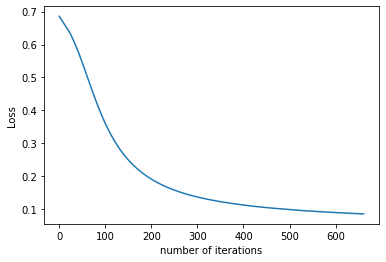

In [18]:
import pandas as pd
import random
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing

from google.colab import files #Set up the data points
uploaded = files.upload()
with open('wdbc.data', 'r') as file:
    data = pd.read_csv('wdbc.data', header = None);

#print(data.shape) 
#data.head()
#print(data)

test = data[470:569]
train = data[:469]

final_in = test[data.columns[2:31]]
final_out = test[data.columns[1]]

final_in = preprocessing.normalize(final_in, axis = 0)
final_in = pd.DataFrame(final_in, columns = test[data.columns[2:31]].columns)

train = train.sample(frac = 1);
train = train.reset_index(drop=True)    

train_in = train[data.columns[2:31]]
train_out = train[data.columns[1]]

train_in = preprocessing.normalize(train_in, axis = 0) #Normalize the data 
train_in = pd.DataFrame(train_in, columns = train[data.columns[2:31]].columns)

#5 fold validation    
fold1_in = train_in[:93]
fold1_out = train_out[:93]
fold2_in = train_in[94:187]
fold2_out = train_out[94:187]
fold3_in = train_in[188:281]
fold3_out = train_out[188:281]
fold4_in = train_in[282:375]
fold4_out = train_out[282:375]
fold5_in = train_in[376:469]
fold5_out = train_out[376:469]

train1_in = pd.concat([fold1_in, fold2_in, fold3_in, fold4_in])
test1_in = fold5_in
train1_out = pd.concat([fold1_out, fold2_out, fold3_out, fold4_out])
test1_out = fold5_out
train2_in = pd.concat([fold1_in, fold2_in, fold3_in, fold5_in])
test2_in = fold4_in
train2_out = pd.concat([fold1_out, fold2_out, fold3_out, fold5_out])
test2_out = fold4_out
train3_in = pd.concat([fold1_in, fold2_in, fold4_in, fold5_in])
test3_in = fold3_in
train3_out = pd.concat([fold1_out, fold2_out, fold4_out, fold5_out])
test3_out = fold3_out
train4_in = pd.concat([fold1_in, fold3_in, fold4_in, fold5_in])
test4_in = fold2_in
train4_out = pd.concat([fold1_out, fold3_out, fold4_out, fold5_out])
test4_out = fold2_out
train5_in = pd.concat([fold2_in, fold3_in, fold4_in, fold5_in])
test5_in = fold1_in
train5_out = pd.concat([fold2_out, fold3_out, fold4_out, fold5_out])
test5_out = fold1_out

train_in = [train1_in, train2_in, train3_in, train4_in, train5_in]
train_out = [train1_out, train2_out, train3_out, train4_out, train5_out]
test_in = [test1_in, test2_in, test3_in, test4_in, test5_in]
test_out = [test1_out, test2_out, test3_out, test4_out, test5_out]

mpl_models = []
svm_models = []
mpl_scores = []
svm_scores = []

for x in range(5):
  mpl_models.append(MLPClassifier(random_state = 1, max_iter = 1000).fit(train_in[x], train_out[x]))
  mpl_scores.append(mpl_models[x].score(test_in[x], test_out[x]))
  svm_models.append(SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced', random_state = 1).fit(train_in[x], train_out[x]))
  svm_scores.append(svm_models[x].score(test_in[x], test_out[x]))
print(mpl_scores)
print(svm_scores)
best_mpl = mpl_models[mpl_scores.index(max(mpl_scores))]
best_svm = svm_models[svm_scores.index(max(svm_scores))]
mpl_score = best_mpl.score(final_in, final_out)
svm_score = best_svm.score(final_in, final_out)
print("Best MPL Model score is: ", mpl_score)
print("Best SVM Model score is: ", svm_score)
fig, ax = plt.subplots()
ax.plot(best_mpl.loss_curve_)
ax.set_xlabel('number of iterations')
ax.set_ylabel('Loss')
plt.show()

[0.978494623655914, 0.967741935483871, 0.9354838709677419, 0.956989247311828, 0.978494623655914]
[0.946236559139785, 0.989247311827957, 0.946236559139785, 0.956989247311828, 0.989247311827957]
Best MPL Model score is:  0.9797979797979798
Best SVM Model score is:  0.9797979797979798


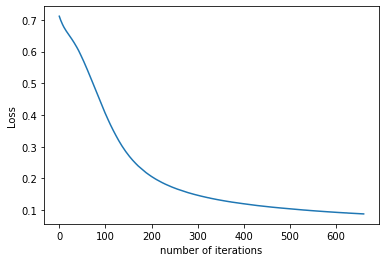

In [17]:
import pandas as pd
import random
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit


from google.colab import files #Set up the data points
uploaded = files.upload()
with open('wdbc.data', 'r') as file:
    data = pd.read_csv('wdbc.data', header = None);

#print(data.shape) 
#data.head()
#print(data)

data_in = data[data.columns[2:31]]
data_out = data[data.columns[1]]

data_in = preprocessing.normalize(data_in, axis = 0)
data_in = pd.DataFrame(data_in, columns = data[data.columns[2:31]].columns)

data_in.insert(0, 1, data_out, True)

test = data_in[470:569]
train = data_in[:469]

final_in = test[data.columns[2:30]]
final_out = test[data.columns[1]]

train = train.sample(frac = 1);
train = train.reset_index(drop=True)    

train_in = train[data.columns[2:30]]
train_out = train[data.columns[1]]

#5 fold validation    
fold1_in = train_in[:93]
fold1_out = train_out[:93]
fold2_in = train_in[94:187]
fold2_out = train_out[94:187]
fold3_in = train_in[188:281]
fold3_out = train_out[188:281]
fold4_in = train_in[282:375]
fold4_out = train_out[282:375]
fold5_in = train_in[376:469]
fold5_out = train_out[376:469]

train1_in = pd.concat([fold1_in, fold2_in, fold3_in, fold4_in])
test1_in = fold5_in
train1_out = pd.concat([fold1_out, fold2_out, fold3_out, fold4_out])
test1_out = fold5_out
train2_in = pd.concat([fold1_in, fold2_in, fold3_in, fold5_in])
test2_in = fold4_in
train2_out = pd.concat([fold1_out, fold2_out, fold3_out, fold5_out])
test2_out = fold4_out
train3_in = pd.concat([fold1_in, fold2_in, fold4_in, fold5_in])
test3_in = fold3_in
train3_out = pd.concat([fold1_out, fold2_out, fold4_out, fold5_out])
test3_out = fold3_out
train4_in = pd.concat([fold1_in, fold3_in, fold4_in, fold5_in])
test4_in = fold2_in
train4_out = pd.concat([fold1_out, fold3_out, fold4_out, fold5_out])
test4_out = fold2_out
train5_in = pd.concat([fold2_in, fold3_in, fold4_in, fold5_in])
test5_in = fold1_in
train5_out = pd.concat([fold2_out, fold3_out, fold4_out, fold5_out])
test5_out = fold1_out

train_in = [train1_in, train2_in, train3_in, train4_in, train5_in]
train_out = [train1_out, train2_out, train3_out, train4_out, train5_out]
test_in = [test1_in, test2_in, test3_in, test4_in, test5_in]
test_out = [test1_out, test2_out, test3_out, test4_out, test5_out]

mpl_models = []
svm_models = []
mpl_scores = []
svm_scores = []

for x in range(5):
  mpl_models.append(MLPClassifier(random_state = 1, max_iter = 1000).fit(train_in[x], train_out[x]))
  mpl_scores.append(mpl_models[x].score(test_in[x], test_out[x]))
  svm_models.append(SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced', random_state = 1).fit(train_in[x], train_out[x]))
  svm_scores.append(svm_models[x].score(test_in[x], test_out[x]))
print(mpl_scores)
print(svm_scores)
best_mpl = mpl_models[mpl_scores.index(max(mpl_scores))]
best_svm = svm_models[svm_scores.index(max(svm_scores))]
mpl_score = best_mpl.score(final_in, final_out)
svm_score = best_svm.score(final_in, final_out)
print("Best MPL Model score is: ", mpl_score)
print("Best SVM Model score is: ", svm_score)
fig, ax = plt.subplots()
ax.plot(best_mpl.loss_curve_)
ax.set_xlabel('number of iterations')
ax.set_ylabel('Loss')
plt.show()

[0.946236559139785, 0.9354838709677419, 0.946236559139785, 0.9354838709677419, 0.967741935483871]
[0.9032258064516129, 0.9139784946236559, 0.9247311827956989, 0.8602150537634409, 0.946236559139785]
Best MPL Model score is:  0.9494949494949495
Best SVM Model score is:  0.9191919191919192


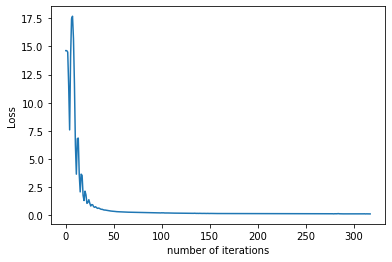

In [19]:
import pandas as pd
import random
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing

from google.colab import files #Set up the data points
uploaded = files.upload()
with open('wdbc.data', 'r') as file:
    data = pd.read_csv('wdbc.data', header = None);

#print(data.shape) 
#data.head()
#print(data)

test = data[470:569]
train = data[:469]

final_in = test[data.columns[2:31]]
final_out = test[data.columns[1]]

train = train.sample(frac = 1);
train = train.reset_index(drop=True)    

train_in = train[data.columns[2:31]]
train_out = train[data.columns[1]]

#5 fold validation    
fold1_in = train_in[:93]
fold1_out = train_out[:93]
fold2_in = train_in[94:187]
fold2_out = train_out[94:187]
fold3_in = train_in[188:281]
fold3_out = train_out[188:281]
fold4_in = train_in[282:375]
fold4_out = train_out[282:375]
fold5_in = train_in[376:469]
fold5_out = train_out[376:469]

train1_in = pd.concat([fold1_in, fold2_in, fold3_in, fold4_in])
test1_in = fold5_in
train1_out = pd.concat([fold1_out, fold2_out, fold3_out, fold4_out])
test1_out = fold5_out
train2_in = pd.concat([fold1_in, fold2_in, fold3_in, fold5_in])
test2_in = fold4_in
train2_out = pd.concat([fold1_out, fold2_out, fold3_out, fold5_out])
test2_out = fold4_out
train3_in = pd.concat([fold1_in, fold2_in, fold4_in, fold5_in])
test3_in = fold3_in
train3_out = pd.concat([fold1_out, fold2_out, fold4_out, fold5_out])
test3_out = fold3_out
train4_in = pd.concat([fold1_in, fold3_in, fold4_in, fold5_in])
test4_in = fold2_in
train4_out = pd.concat([fold1_out, fold3_out, fold4_out, fold5_out])
test4_out = fold2_out
train5_in = pd.concat([fold2_in, fold3_in, fold4_in, fold5_in])
test5_in = fold1_in
train5_out = pd.concat([fold2_out, fold3_out, fold4_out, fold5_out])
test5_out = fold1_out

train_in = [train1_in, train2_in, train3_in, train4_in, train5_in]
train_out = [train1_out, train2_out, train3_out, train4_out, train5_out]
test_in = [test1_in, test2_in, test3_in, test4_in, test5_in]
test_out = [test1_out, test2_out, test3_out, test4_out, test5_out]

mpl_models = []
svm_models = []
mpl_scores = []
svm_scores = []

for x in range(5):
  mpl_models.append(MLPClassifier(random_state = 1, max_iter = 1000).fit(train_in[x], train_out[x]))
  mpl_scores.append(mpl_models[x].score(test_in[x], test_out[x]))
  svm_models.append(SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced', random_state = 1).fit(train_in[x], train_out[x]))
  svm_scores.append(svm_models[x].score(test_in[x], test_out[x]))
print(mpl_scores)
print(svm_scores)
best_mpl = mpl_models[mpl_scores.index(max(mpl_scores))]
best_svm = svm_models[svm_scores.index(max(svm_scores))]
mpl_score = best_mpl.score(final_in, final_out)
svm_score = best_svm.score(final_in, final_out)
print("Best MPL Model score is: ", mpl_score)
print("Best SVM Model score is: ", svm_score)

fig, ax = plt.subplots()
ax.plot(best_mpl.loss_curve_)
ax.set_xlabel('number of iterations')
ax.set_ylabel('Loss')
plt.show()

Report
The Models 2 and 3 did really good were able to get above a 90%. The main problem I saw is stated below and is the reason I gave 3 models so I could test diffrent things with the preprocessing.  

Things I noticed 
*   Since we are using the last 99 coloumns in the data set we need to preprocess before we split the data because this data is randomly given to us there is an order where more B data points are at the bottom then the top. This causes the data for those points to be off.
*   What is stated above makes me wonder about ever preprocessing our data becuase the Neural Network doesn't seem to need to be preprocessed. I did a run with out any preprocessing the data. While it did do worse compared to the one wehre I preprocessed then split the data it still has over a 90% sucess rate for both models. 

Refrences (For loss curve)
https://www.tutorialspoint.com/how-to-appropriately-plot-the-losses-values-acquired-by-loss-curve-from-mlpclassifier-matplotlib